# **Dataset Balancing - Practical Exercise**

## *Gregorio Mendoza Serrano*

During this exercise, we will analyze what needs to be done in highly imbalanced environments, such as credit card fraud. In this environment, the fraud detection rate can be as low as 1 in 1000. Therefore, the initial challenge is always to have a properly balanced dataset.

Fraud detection systems rely on a set of parameters or attributes from each credit card transaction to predict whether a particular transaction is fraudulent or not.

The goal of this exercise is to explore various techniques for oversampling or subsampling.

As a source for this exercise, we will work with a credit card data dataset where transactions are already categorized as fraudulent or not:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

---

**Note:** This notebook will use the proposed dataset (*credit card fraud*) to compare four different balancing techniques:
- Random Upsampling
- Random Downsampling
- SMOTE Resampling
- ADASYN Resampling

**Note 2:** This notebook has been designed to be executed locally.

---

# 0. Import of Libraries and Dataset

To begin, let's import the necessary external libraries.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN

Matplotlib is building the font cache; this may take a moment.


Now let's import the dataset:


In [3]:
df = pd.read_csv('creditcard.csv')

# 1. Data Preparation and Exploratory Data Analysis

We will start by removing duplicates and null values from the dataset:

In [4]:
# Remove null and duplicate records:
df = df.drop_duplicates().dropna()

# Display the shape:
print('Shape of processed Pandas DataFrame =', df.shape)

Shape of processed Pandas list = (283726, 31)


Let's print the header to understand its structure:

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's display the description of the features:

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Let's print the count of the classes in the `'Class'` column:

In [7]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Let's plot the confusion matrix to get an overview of correlations and collinearities:

In [8]:
df_corr = df.corr()
fig = px.imshow(df_corr, color_continuous_scale='Viridis', labels=dict(color='Correlación'))
fig.update_layout(title='Matriz de Correlación', width=600, height=550)
fig.show()

# 2. Balancing Methods (Functions)

**"Random upsampling"** is a technique used to balance imbalanced datasets by randomly increasing the number of samples in the minority class. In this process, samples from the minority class are randomly selected and duplicated, which helps to equalize the representation of classes in the dataset and improve the performance of predictive models in situations of extreme imbalance.

In [9]:
def upsample(df):

    # Separate the majority and minority classes
    df_majority = df[df.Class == 0]
    df_minority = df[df.Class == 1]

    # Perform upsampling of the minority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # allow repetitions
                                     n_samples=len(df_majority),    # equalize number to the majority class
                                     random_state=3)   # reproducibility

    # Combine the upsampled minority class and the majority class
    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    return df_balanced

**"Random downsampling"** is a technique used to reduce the number of samples in the majority class of an imbalanced dataset. This is achieved by randomly selecting samples from the majority class and removing them from the dataset, which helps to balance the representation of the classes and improve the performance of predictive models in situations of extreme imbalance.

In [10]:
def downsample(df):

    # Separate the majority and minority classes
    df_majority = df[df.Class == 0]
    df_minority = df[df.Class == 1]

    # Perform downsampling of the majority class
    df_majority_downsampled = resample(df_majority,
                                       replace=False,     # no repetitions
                                       n_samples=len(df_minority),    # equalize number to the minority class
                                       random_state=3)   # reproducibility

    # Combine the downsampled majority class and the minority class
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    return df_balanced

**SMOTE (Synthetic Minority Over-sampling Technique)** is a supervised resampling method used to balance imbalanced datasets by synthetically generating new samples of the minority class. The algorithm works as follows:

1. For each sample in the minority class, find its k nearest neighbors from the same class.

2. Randomly select one of the k neighbors.

3. Calculate the difference between the feature vector of the current minority sample and the feature vector of the selected neighbor.

4. Multiply this difference by a random number between 0 and 1.

5. Add the result to the features of the current minority sample to generate a new synthetic sample.

This process is repeated until the desired number of synthetic samples of the minority class is reached. This allows for an increase in the representation of the minority class in the dataset, which helps to improve the performance of predictive models in situations of extreme imbalance.

In [11]:
def SMOTE_resampling(df):
    # Separate the features (X) and the target variable (y)
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Apply SMOTE
    smote = SMOTE(random_state=3)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine the features and the target variable into a new DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled['Class'] = y_resampled

    return df_resampled

**ADASYN (Adaptive Synthetic Sampling)** is a resampling method used to balance imbalanced datasets in machine learning. This method generates synthetic samples for the minority classes based on the density distribution of the original samples. Unlike techniques such as SMOTE, ADASYN focuses on generating synthetic samples for the minority samples that are harder to learn, which can significantly improve the performance of predictive models in situations of extreme imbalance.

ADASYN works as follows:

1. **Density Distribution**: The density distribution of each sample in the minority class is calculated.

2. **Synthetic Sample Generation**: Synthetic samples are generated based on the calculated density distribution.

3. **Adaptation**: The number of synthetic samples generated is adjusted according to the learning difficulty of each minority sample, allowing the focus to be on the harder samples.

This adaptive approach helps to improve the representation of the minority classes and to reduce the bias towards the majority class, enhancing the accuracy of predictive models in applications such as intrusion detection, medical research, and fraud detection.

In [12]:
def ADASYN_resampling(df):
    # Separate the features (X) and the target variable (y)
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Check for null values and remove them if necessary
    if X.isnull().values.any() or y.isnull().values.any():
        print("Removing null values from the DataFrame")
        df = df.dropna()
        X = df.drop('Class', axis=1)
        y = df['Class']

    # Apply ADASYN
    adasyn = ADASYN(random_state=3)
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    # Combine the features and the target variable into a new DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled['Class'] = y_resampled

    return df_resampled

# 3. Dataset Balancing

## 3.1 Random Downsampling

We apply the corresponding function from the previous section to obtain a balanced dataframe. After that, we print the class count after balancing and the header of the balanced dataframe.

In [13]:
df_downsampled = downsample(df)

# Show the class distribution in the balanced dataset
print(df_downsampled.Class.value_counts())

# Show the first few rows of the balanced dataset
df_downsampled.head()

Class
0    473
1    473
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178812,123792.0,0.227318,0.329497,0.540253,-0.896754,0.598434,0.838007,0.004997,0.321703,0.585747,...,0.231670,0.815008,-0.252218,-0.327390,-0.176310,-0.273304,0.077106,0.000928,0.01,0
249863,154611.0,2.038839,-0.149242,-2.956730,-0.577779,2.608658,3.142897,-0.415941,0.784209,0.359819,...,-0.351904,-0.997312,0.362859,0.604863,-0.264820,0.219595,-0.039344,-0.042663,2.69,0
239436,150107.0,-0.756581,0.339872,-0.318501,-0.717345,0.743666,-0.016891,1.754176,-0.115205,-0.554295,...,0.222798,0.144841,-0.059608,-0.110158,1.143284,0.817861,-0.219694,-0.043305,234.51,0
217866,141072.0,1.948700,-0.554246,-0.975652,0.661720,-0.697852,-1.089365,-0.147841,-0.259557,-1.055040,...,0.014258,0.460254,0.086333,0.505253,0.068890,-0.484124,0.012057,-0.042083,62.00,0
23807,32925.0,-8.321208,4.589644,-6.546650,1.359235,-5.417690,-1.357975,-2.904797,5.412110,-0.134929,...,0.246966,0.009702,0.111681,0.392514,-0.131513,-0.363780,0.161165,-0.061328,89.99,0


## 3.2 Random Upsampling

We apply the corresponding function from the previous section to obtain a balanced dataframe. After that, we print the class count after balancing and the header of the balanced dataframe.

In [14]:
df_upsampled = upsample(df)

# Show the class distribution in the balanced dataset
print(df_upsampled.Class.value_counts())

# Show the first few rows of the balanced dataset
df_upsampled.head()

Class
0    283253
1    283253
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3.3 SMOTE

Let's apply the corresponding function from the previous section to obtain a balanced dataframe. After that, we print the class count after balancing and the header of the balanced dataframe.

In [15]:
df_SMOTE = SMOTE_resampling(df)

# Show the class distribution in the balanced dataset
print(df_SMOTE.Class.value_counts())

# Show the first few rows of the balanced dataset
df_SMOTE.head()

Class
0    283253
1    283253
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3.4 ADASYN

Let's apply the corresponding function from the previous section to obtain a balanced dataframe. After that, we print the class count after balancing and the header of the balanced dataframe.

In [16]:
df_ADASYN = ADASYN_resampling(df)

# Show the class distribution in the balanced dataset
print(df_ADASYN.Class.value_counts())

# Show the first few rows of the balanced dataset
df_ADASYN.head()

Class
1    283299
0    283253
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3.5 Saving Resulting DataFrames

Let's create a dictionary to store the balanced dataframes from this section.

The keys of the dictionary will be the names of the balancing algorithms used.

In [17]:
df_balanced_dict = {
    'Upsampling': df_upsampled,
    'Downsampling': df_downsampled,
    'ADASYN': df_ADASYN,
    'SMOTE': df_SMOTE
}

# 4. Predictions after Balancing

Let's import the necessary Scikit-Learn libraries for predictions:

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## 4.1 Random Forest

First, let's create a Python function that returns the prediction reports for the incoming dataframes (the input is the dictionary of balanced dataframes), along with metrics and confusion matrices. The algorithm used for predictions is a **Random Forest**.

In [19]:
def RandomForest_predict_and_report(df_balanced_dict):

    reports = {}

    for key, df in df_balanced_dict.items():

        # Prepare the dataframe for prediction
        X = df.drop('Class', axis=1)
        y = df['Class']

        # Split the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

        # Create a random forest model
        model = RandomForestClassifier(n_estimators=100, random_state=3)

        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        # Save the results in the dictionary
        reports[key] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': confusion
        }

    return reports

Let's query the previous function and obtain an output dictionary with the resulting reports:

In [20]:
RandomForest_reports = RandomForest_predict_and_report(df_balanced_dict)

## 4.2 k-Nearest Neighbors

Next, let's create a Python function that returns the prediction reports for the incoming dataframes (similar to the previously created function), along with metrics and confusion matrices, but this time using a **k-Nearest Neighbors** algorithm for prediction. This algorithm is chosen because it is instance-based, providing a different predictive mechanism compared to the previously created Random Forest, which could yield slightly different conclusions upon examining the results.

In [21]:
def kNN_predict_and_report(df_balanced_dict):

    reports = {}

    for key, df in df_balanced_dict.items():

        # Prepare the dataframe for prediction
        X = df.drop('Class', axis=1)
        y = df['Class']

        # Split the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

        # Create the kNN model
        k = 5  # Number of neighbors
        model = KNeighborsClassifier(n_neighbors=k)

        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        # Save the results in the dictionary
        reports[key] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': confusion
        }

    return reports

Let's query the previous function and obtain an output dictionary with the resulting reports:

In [22]:
kNN_reports = kNN_predict_and_report(df_balanced_dict)

Let's print the structure of one of the resulting report dictionaries for verification:

In [23]:
kNN_reports

{'Upsampling': {'accuracy': 0.9991350549857901,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56472\n           1       1.00      1.00      1.00     56830\n\n    accuracy                           1.00    113302\n   macro avg       1.00      1.00      1.00    113302\nweighted avg       1.00      1.00      1.00    113302\n',
  'confusion_matrix': array([[56374,    98],
         [    0, 56830]], dtype=int64)},
 'Downsampling': {'accuracy': 0.6631578947368421,
  'report': '              precision    recall  f1-score   support\n\n           0       0.69      0.68      0.68       102\n           1       0.63      0.65      0.64        88\n\n    accuracy                           0.66       190\n   macro avg       0.66      0.66      0.66       190\nweighted avg       0.66      0.66      0.66       190\n',
  'confusion_matrix': array([[69, 33],
         [31, 57]], dtype=int64)},
 'ADASYN': {'accuracy': 0.9606216519137595

# 5. Result Visualization

## 5.1 Confusion Matrices

First, let's create a Python function to plot the confusion matrices in a grid layout:

In [67]:
def plot_confusion_matrices_grid(dict_knn, dict_rf):
    """
    Draws a grid of eight confusion matrices, with two columns and four rows.

    Parameters:
    dict_knn (dict): Dictionary with four confusion matrices for kNN.
    dict_rf (dict): Dictionary with four confusion matrices for Random Forest.
    """
    fig, axes = plt.subplots(4, 2, figsize=(10, 15))
    fig.suptitle('Model Comparison: kNN vs Random Forest', fontsize=20)

    for idx, key in enumerate(dict_knn.keys()):
        row = idx

        # Get the confusion matrices
        cm_knn = dict_knn[key]['confusion_matrix']
        cm_rf = dict_rf[key]['confusion_matrix']

        # Check that the confusion matrices are 2D
        if cm_knn.ndim != 2 or cm_rf.ndim != 2:
            raise ValueError(f"The confusion matrix for '{key}' is not 2D.")

        # Confusion matrix for kNN
        ax = axes[row, 0]
        sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', ax=ax)
        ax.set_title(f'kNN - {key}')
        ax.set_xlabel('Prediction')
        ax.set_ylabel('Actual')

        # Confusion matrix for Random Forest
        ax = axes[row, 1]
        sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=ax)
        ax.set_title(f'Random Forest - {key}')
        ax.set_xlabel('Prediction')
        ax.set_ylabel('Actual')

    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96], pad=2.0, w_pad=2.0, h_pad=3.0)
    plt.show()

Let's display the confusion matrices on the screen:

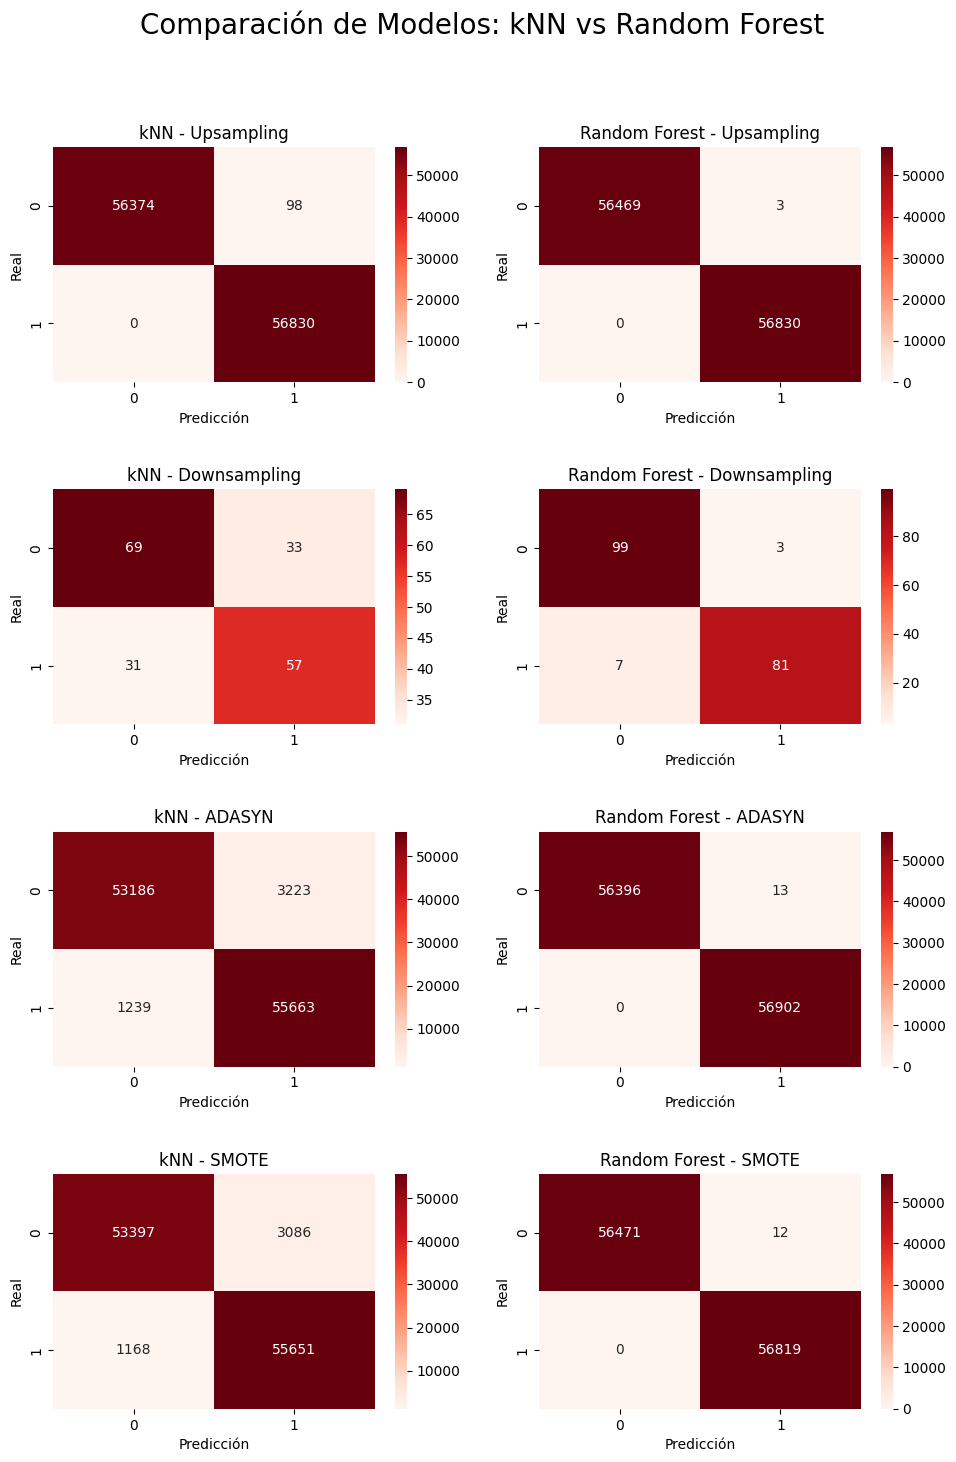

In [68]:
plot_confusion_matrices_grid(kNN_reports, RandomForest_reports)

## 5.1 Prediction Reports

Let's create a function to print the prediction reports with metrics sequentially on the screen:

In [93]:
def plot_report_grid(dict_knn, dict_rf):
    """
    Prints the reports of both models in a two-column, four-row grid.

    Parameters:
    dict_knn (dict): Dictionary with the kNN reports.
    dict_rf (dict): Dictionary with the Random Forest reports.
    """
    print("Model Reports: kNN vs Random Forest\n")

    # Get the total number of reports
    total_reports = len(dict_knn)

    # Print the reports in two columns with a separating line
    for idx, (key_knn, knn_report) in enumerate(dict_knn.items()):
        key_rf, rf_report = list(dict_rf.items())[idx]

        # Print kNN report
        print(f"kNN - {key_knn}:\n{knn_report['report']}\n")

        # Print separating line
        #print("|" * 50)

        # Print Random Forest report
        print(f"Random Forest - {key_rf}:\n{rf_report['report']}\n")

        # Print separating line between each pair of reports
        if idx < total_reports - 1:
            print("-" * 100)

Let's print the prediction reports on the screen:

In [94]:
plot_report_grid(kNN_reports, RandomForest_reports)

Reportes de Modelos: kNN vs Random Forest

kNN - Upsampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56472
           1       1.00      1.00      1.00     56830

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


Random Forest - Upsampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56472
           1       1.00      1.00      1.00     56830

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


----------------------------------------------------------------------------------------------------
kNN - Downsampling:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       102
           1       0.63  

# 6. Conclusions

The conclusions we can draw from the results are as follows:

- Consistently, judging by the confusion matrices, the model that benefits the most from the dataset balancing is **Random Forest**.
- Among the balancing algorithms tested with **Random Forest**, any of them seem to have acceptable accuracy. However, the one that achieves the best results is **Random Upsampling**, with the only errors in this case being False Positives (the critical failures are False Negatives or 'undetected fraud').
- Regarding **k-Neighbors**, both SMOTE and ADASYN produce a large number of errors (both false positives and false negatives). This could be due to the production of non-optimal synthetic records or with a significant noise component—a factor to which the kNN instance algorithm is very sensitive.
- The best balancing for the case of **k-Neighbors** seems to be **Random Upsampling**, as the achieved prediction is quite high and the only errors are due to False Positives (the critical failures are False Negatives or 'undetected fraud').

In summary, Random Forest generally handles the introduction of synthetic data and class balancing better due to its robust nature and its ability to capture complex relationships in the data, while k-NN is more negatively affected due to its dependence on the local distribution of data.

---